<a href="https://colab.research.google.com/github/Tayyabahamed06/local/blob/main/EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of rows: 57394, Number of columns: 49


<Figure size 1000x600 with 0 Axes>

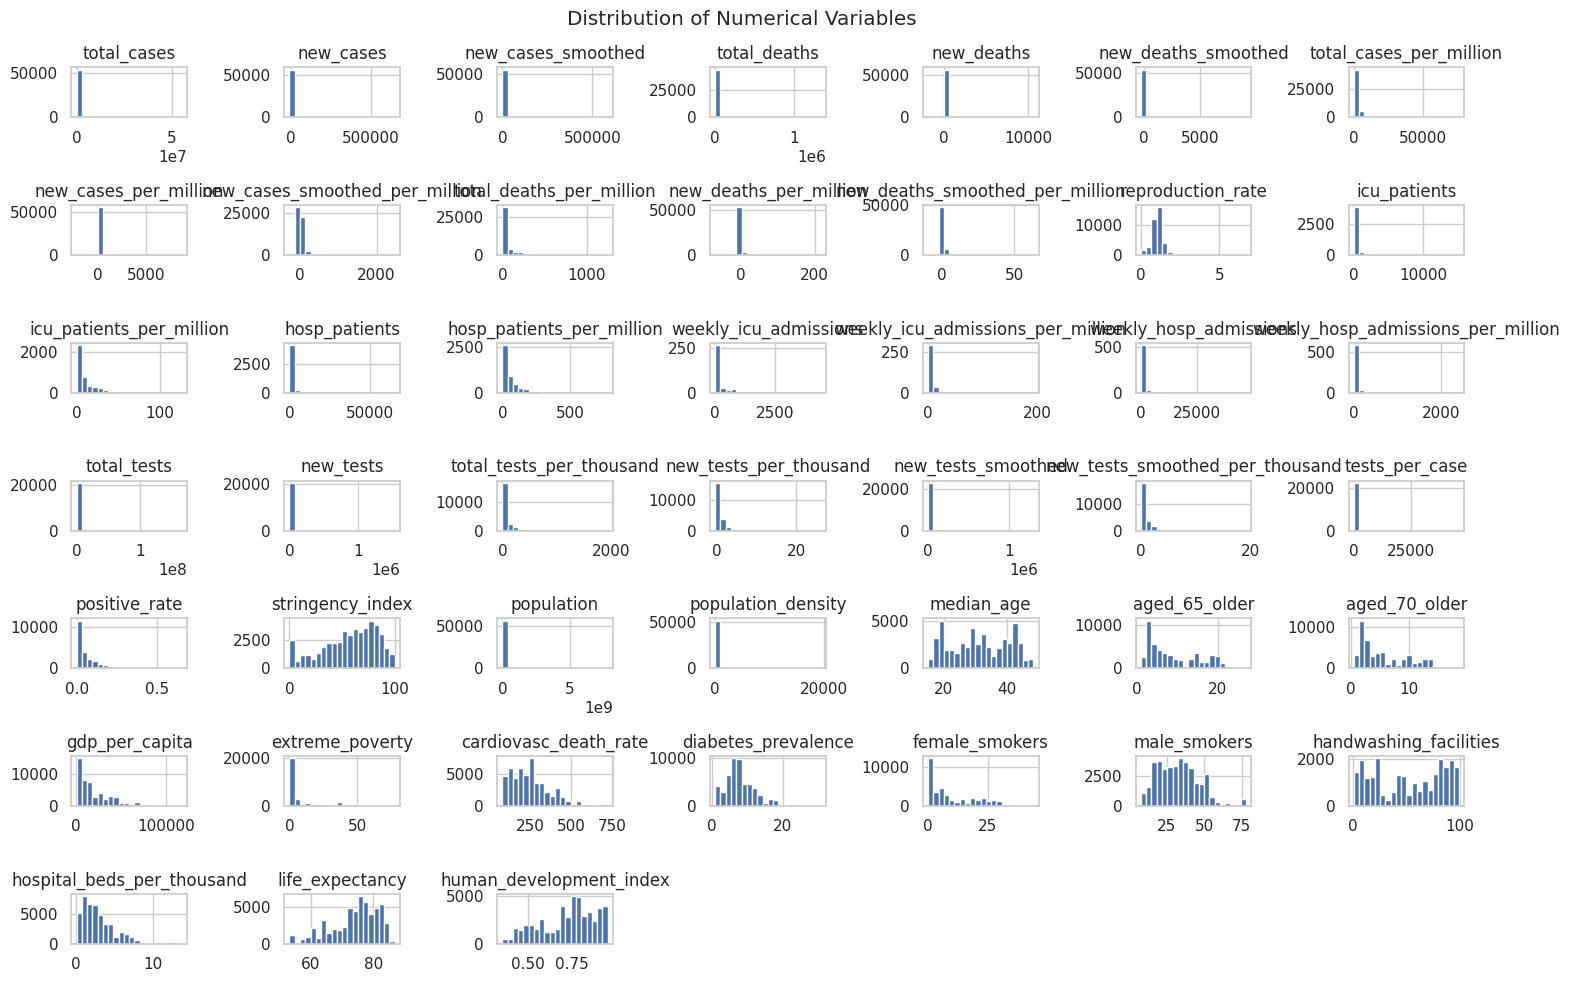

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

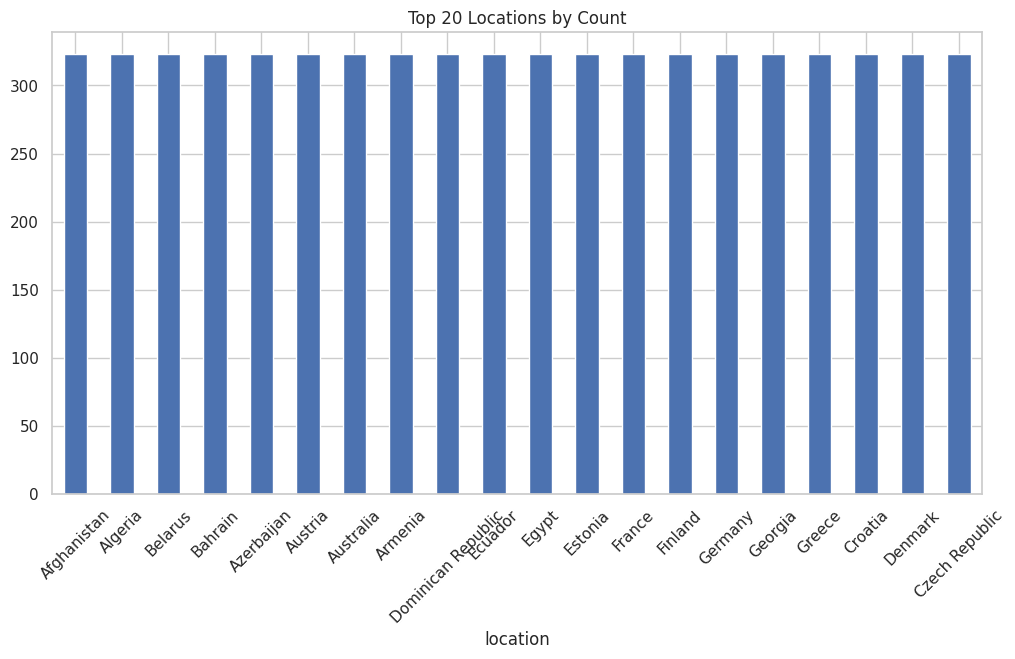

Continent with maximum frequency: Europe


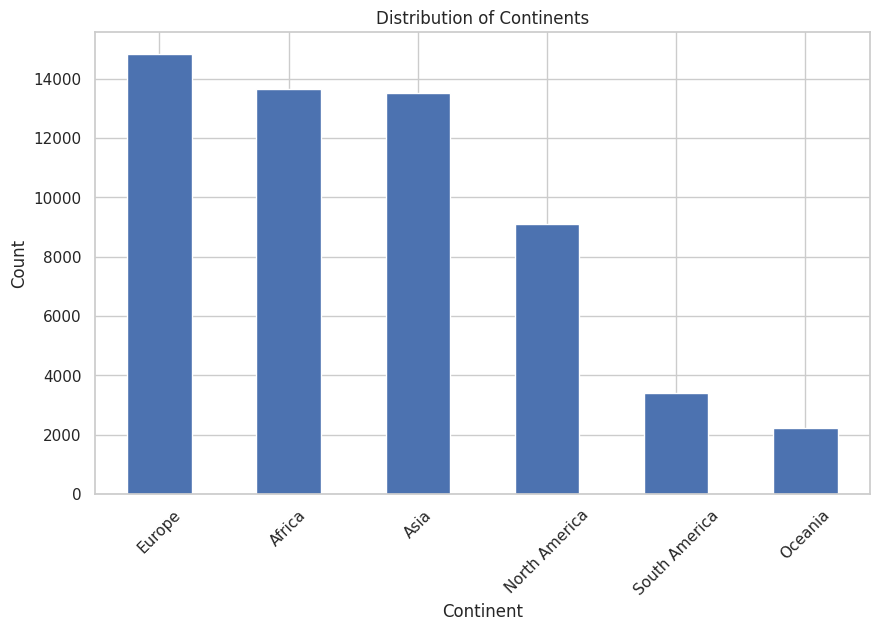

Maximum total_cases: 55154651.0
Mean total_cases: 167797.3688753302


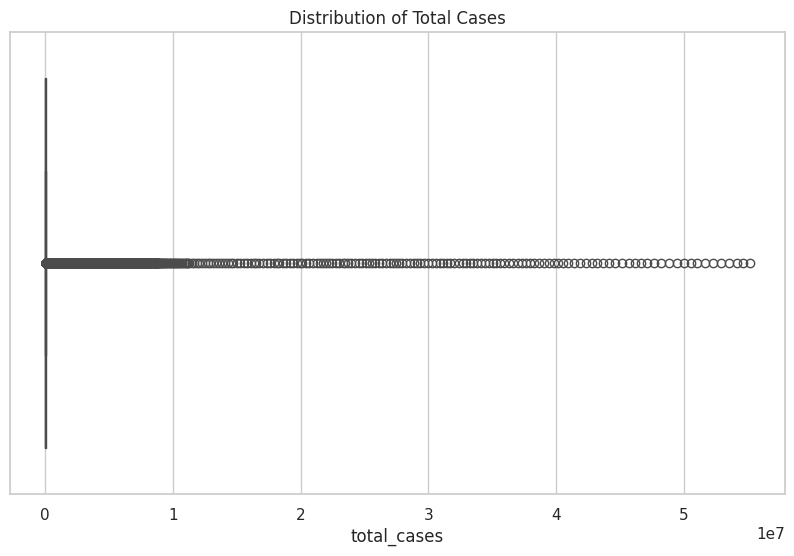

0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


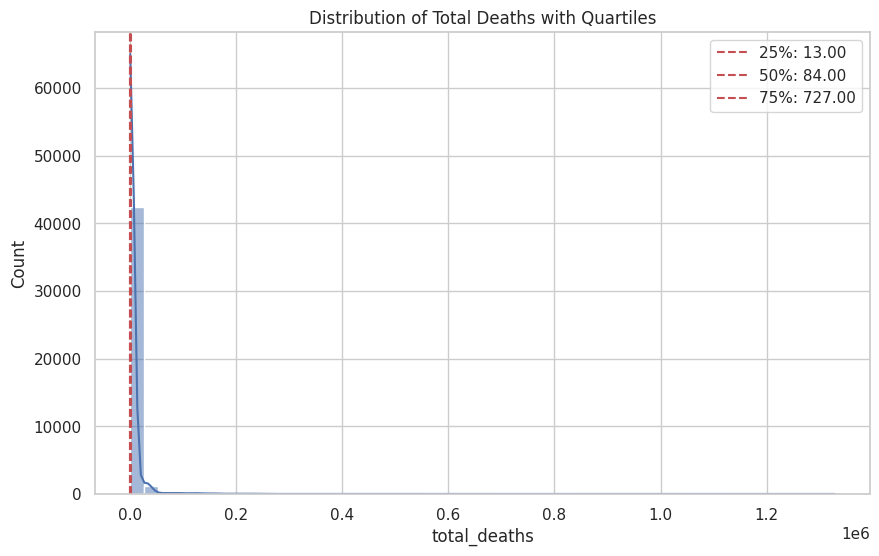

Continent with maximum HDI: Europe


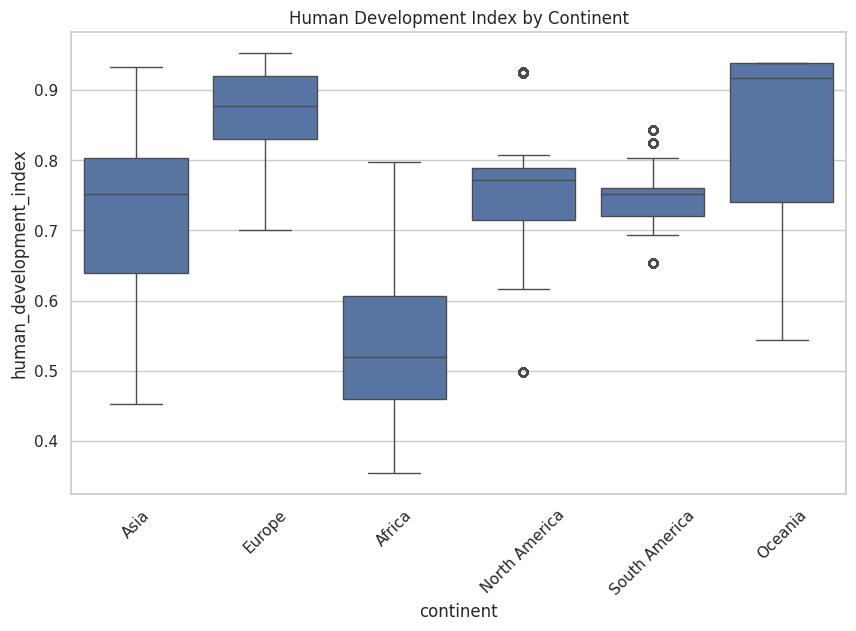

Continent with minimum GDP per capita: Africa


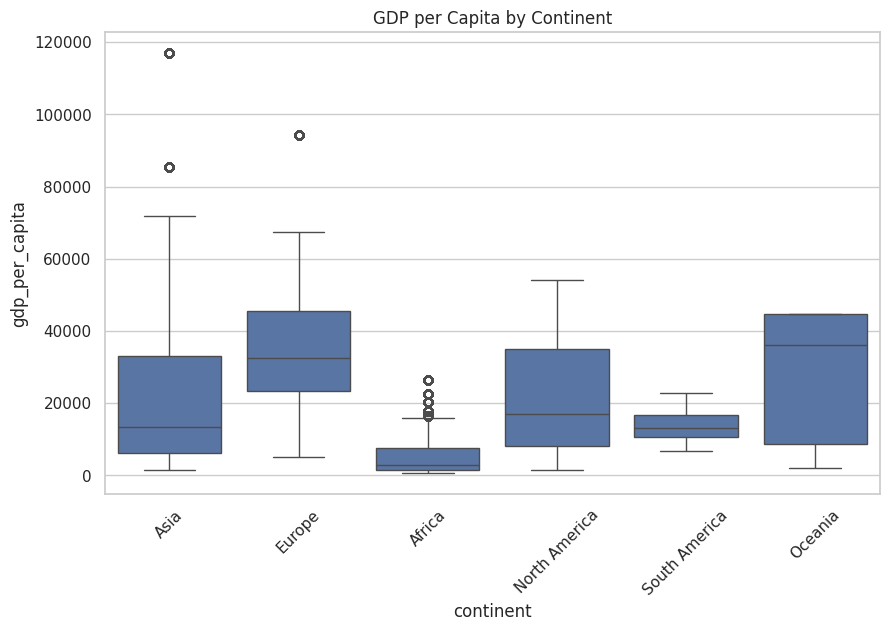

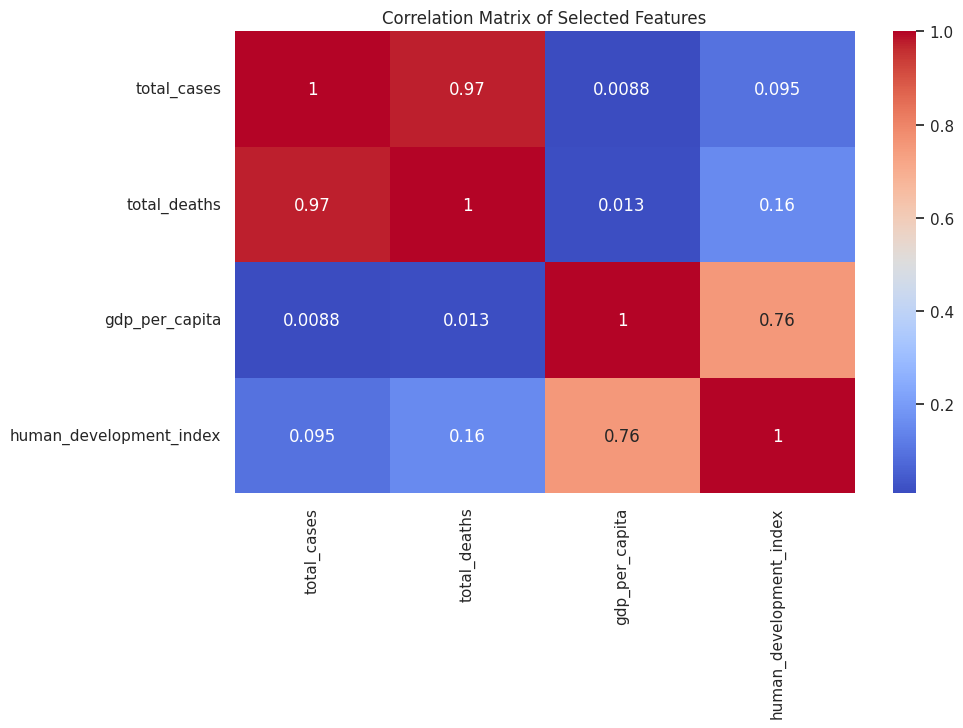

Missing values:
 continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


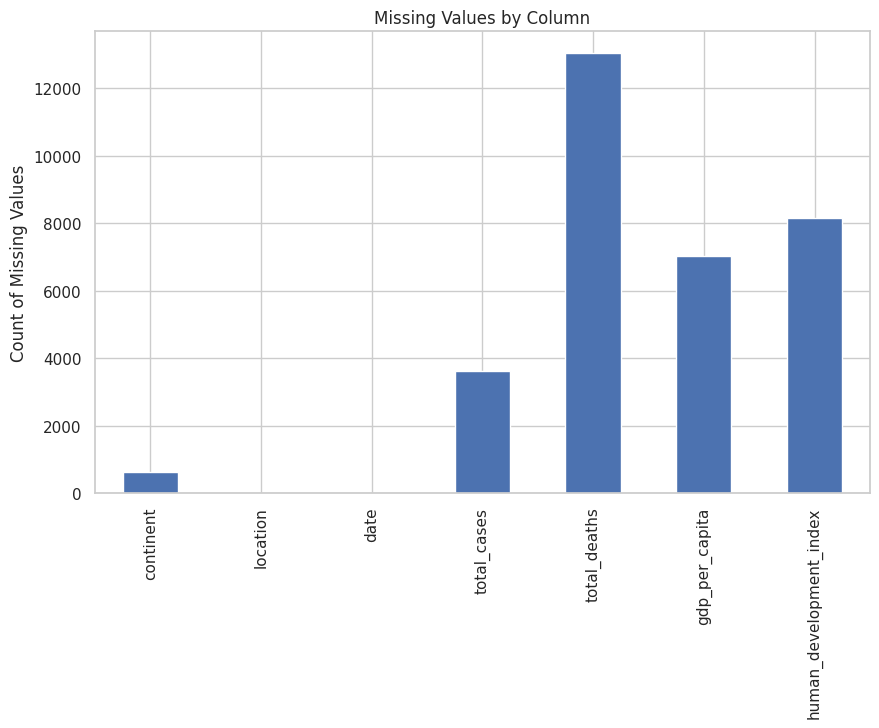

ValueError: time data "31/12/19" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

## Step 1: Import the dataset
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

## Step 2: High Level Data Understanding

### a. Find no. of rows & columns in the dataset
rows, columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

# Plot distribution of numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Variables")
plt.tight_layout()
plt.show()

### b. Data types of columns
print(df.dtypes)

### c. Info & describe of data in dataframe
print(df.info())
print(df.describe())

## Step 3: Low Level Data Understanding

### a. Find count of unique values in location column
unique_locations = df['location'].nunique()
print(f"Unique locations: {unique_locations}")

# Plot top 20 locations by count
plt.figure(figsize=(12, 6))
df['location'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Locations by Count")
plt.xticks(rotation=45)
plt.show()

### b. Find which continent has maximum frequency using values counts
continent_counts = df['continent'].value_counts()
max_continent = continent_counts.idxmax()
print(f"Continent with maximum frequency: {max_continent}")

# Plot continent distribution
plt.figure(figsize=(10, 6))
continent_counts.plot(kind='bar')
plt.title("Distribution of Continents")
plt.xlabel("Continent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### c. Find maximum & mean value in 'total_cases'
max_cases = df['total_cases'].max()
mean_cases = df['total_cases'].mean()
print(f"Maximum total_cases: {max_cases}")
print(f"Mean total_cases: {mean_cases}")

# Plot total cases distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_cases'])
plt.title("Distribution of Total Cases")
plt.show()

### d. Find 25%,50% & 75% quartile value in 'total_deaths'
quartiles = df['total_deaths'].quantile([0.25, 0.5, 0.75])
print(quartiles)

# Plot total deaths distribution with quartiles
plt.figure(figsize=(10, 6))
sns.histplot(df['total_deaths'], bins=50, kde=True)
for q in [0.25, 0.5, 0.75]:
    plt.axvline(quartiles[q], color='r', linestyle='--', label=f'{int(q*100)}%: {quartiles[q]:.2f}')
plt.title("Distribution of Total Deaths with Quartiles")
plt.legend()
plt.show()

### e. Find which continent has maximum 'human_development_index'
continent_hdi = df.groupby('continent')['human_development_index'].max()
max_hdi_continent = continent_hdi.idxmax()
print(f"Continent with maximum HDI: {max_hdi_continent}")

# Plot HDI by continent
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='human_development_index', data=df)
plt.title("Human Development Index by Continent")
plt.xticks(rotation=45)
plt.show()

### f. Find which continent has minimum 'gdp_per_capita'
continent_gdp = df.groupby('continent')['gdp_per_capita'].min()
min_gdp_continent = continent_gdp.idxmin()
print(f"Continent with minimum GDP per capita: {min_gdp_continent}")

# Plot GDP per capita by continent
plt.figure(figsize=(10, 6))
sns.boxplot(x='continent', y='gdp_per_capita', data=df)
plt.title("GDP per Capita by Continent")
plt.xticks(rotation=45)
plt.show()

## Step 4: Filter the dataframe
df = df[['continent','location','date','total_cases','total_deaths','gdp_per_capita','human_development_index']]

# Plot correlation matrix of selected features
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Selected Features")
plt.show()

## Step 5: Data Cleaning

### a. Remove all duplicates observations
df = df.drop_duplicates()

### b. Find missing values in all columns
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Plot missing values
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title("Missing Values by Column")
plt.ylabel("Count of Missing Values")
plt.show()

### c. Remove all observations where continent column value is missing
df = df.dropna(subset=['continent'])

### d. Fill all missing values with 0
df = df.fillna(0)

## Step 6: Date time format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Plot cases over time (sampling for better visualization)
plt.figure(figsize=(12, 6))
df_sample = df.sample(1000)  # Sample for better visualization
sns.lineplot(x='date', y='total_cases', hue='continent', data=df_sample)
plt.title("Total Cases Over Time by Continent")
plt.xticks(rotation=45)
plt.show()

## Additional Visualizations

# Top 10 countries by total cases
top_countries = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Total Cases")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.show()

# Relationship between GDP and Total Cases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='total_cases', hue='continent', data=df)
plt.title("Total Cases vs GDP per Capita")
plt.xscale('log')
plt.yscale('log')
plt.show()

# Relationship between HDI and Total Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x='human_development_index', y='total_deaths', hue='continent', data=df)
plt.title("Total Deaths vs Human Development Index")
plt.yscale('log')
plt.show()

# Final Verification
print(df.head())
print(df.info())